In [3]:
import os
import sys
import argparse
import json
import itertools
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
import IPython.display as display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential

In [8]:
tf.__version__

'2.4.0-dev20200815'

In [9]:
DATA = "./Data/raw_data_processed_out/"

In [10]:
batch_size = 32
img_height = 100
img_width = 100

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 4996 files belonging to 10 classes.
Using 3997 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATA,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4996 files belonging to 10 classes.
Using 999 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


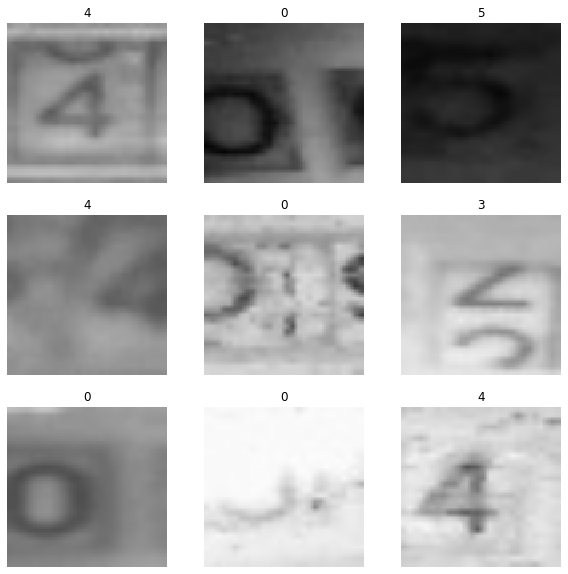

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [21]:
num_classes = 10

model = tf.keras.Sequential([
  keras.layers.experimental.preprocessing.Rescaling(1./255),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes)
])

In [22]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [23]:
#history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)
model.fit(
  train_ds,
  #batch_size=batch_size,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
125/125 [==============================] - 39s 315ms/step - loss: 2.1286 - accuracy: 0.3309 - val_loss: 2.1372 - val_accuracy: 0.3083
Epoch 2/30
125/125 [==============================] - 21s 164ms/step - loss: 2.0640 - accuracy: 0.3467 - val_loss: 2.0752 - val_accuracy: 0.3083
Epoch 3/30
125/125 [==============================] - 21s 167ms/step - loss: 1.9930 - accuracy: 0.3504 - val_loss: 1.9300 - val_accuracy: 0.3233
Epoch 4/30
125/125 [==============================] - 20s 164ms/step - loss: 1.8578 - accuracy: 0.3784 - val_loss: 1.7938 - val_accuracy: 0.3534
Epoch 5/30
125/125 [==============================] - 21s 164ms/step - loss: 1.6943 - accuracy: 0.4228 - val_loss: 1.7318 - val_accuracy: 0.4144
Epoch 6/30
125/125 [==============================] - 21s 166ms/step - loss: 1.5644 - accuracy: 0.4802 - val_loss: 1.5539 - val_accuracy: 0.4805
Epoch 7/30
125/125 [==============================] - 21s 165ms/step - loss: 1.3663 - accuracy: 0.5495 - val_loss: 1.4476 - val_ac

In [24]:
model.save("mymodel.h5")

In [7]:
DATA_DIR_TEST = "./Data/raw_data_out_copy/"

OSError: SavedModel file does not exist at: ./mymodel.h5/{saved_model.pbtxt|saved_model.pb}

In [26]:
from keras.preprocessing import image
# predicting images
path = os.path.join(DATA_DIR_TEST,"four.jpg")

img = image.load_img(path, target_size=(100, 100))
print(img.size)
print(type(img))

x = image.img_to_array(img)
print('x.shape: ', x.shape)
#x1 = np.expand_dims(img, axis=-1)
#print(x1.shape)
x = np.expand_dims(x, axis=0)
#print(x.shape)

images = np.vstack([x]) # vertically stack together
classes = model.predict(images)
print(path)
print(classes)

ModuleNotFoundError: No module named 'keras'

In [ ]:
np.argmax(classes)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')